[0 1 2 3 4 5 6 7 8]
[4.27761051 1.3735936  1.96028006]


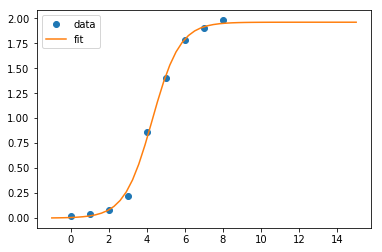

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



In [36]:
def step_fn(length, step_start, slope_len, amp, noise_sigma):
    if step_start + slope_len >= length or step_start <= 0:
        return
    x = np.arange(length)
    y = np.zeros(length)
    for i in range(slope_len):
        y[i + step_start] = amp / (slope_len + 1) * (i+1)

    for i in range(step_start + slope_len, length):
        y[i] = amp
    noise = np.random.normal(0, noise_sigma, len(x))
    y = y + noise
    return x,y
    
    

In [52]:
def sigmoid(x, x0, k, C):
     y = C / (1 + np.exp(-k*(x-x0)))
     return y

def log_growth_fit(xdata, ydata):
    popt, pcov = curve_fit(sigmoid, xdata, ydata)
    print("x0, k, C")
    print(popt)

    x = np.linspace(-1, len(xdata) + 10, len(xdata) + 10)
    y = sigmoid(x, *popt)

    plt.plot(xdata, ydata, 'o', label='data')
    plt.plot(x,y, label='fit')
    plt.legend(loc='best')
    plt.show()


x0, k, C
[13.41382747  0.59515768 10.02389524]


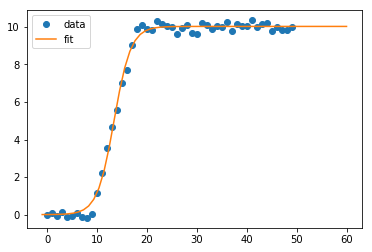

x0, k, C
[20.00065175 20.22911182 10.01947409]


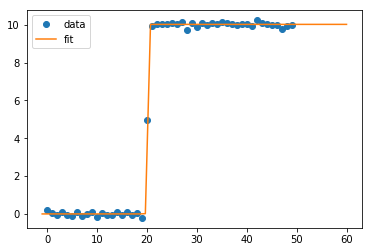

In [53]:
xdata, ydata = step_fn(50, 10, 8, 10,  0.2)
log_growth_fit(xdata, ydata)
xdata, ydata = step_fn(50, 20, 1, 10,  0.1)
log_growth_fit(xdata, ydata)